## Tarea 7. 
Para el ejercicio 3 solo copié y pegué mi programa de integracion con método de Simpson ya que antes de que pusieran el nuevo formato e instrucciones para las tareas ya las había terminado con lo que habían pedido en el tercer notebook de la clase. A partir de esta tarea ya pondré comentarios como se pidió la razón por la que los pasados no tienen comentarios es la misma de que ya la había hecho antes de que pusieran esa regla :) 

## Ejercicio 3

In [312]:
function IntegracionSimpson(f,a,b,n)
h=(b-a)/n
P=linspace(a,b,n+1)    
#IS=(h/3)*(f(a)+f(b))
s=convert(Int64,n/2) #necesitamos que n/2 sea detectado como entero para que el indice i pueda correr en 1:n/2   
IS=0    
    for i in 1:s
        IS=IS+(f(P[2i-1])+4f(P[2i])+f(P[2i+1]))*(h/3)
    end
    IS
end 

IntegracionSimpson (generic function with 1 method)

In [313]:
f(x)=x^2
p(x)=-sin.(x)
IntegracionSimpson(f,0,1,1e4)
p(x)=-sin.(x)

p (generic function with 1 method)

## Ejercicio 4.
Este código lo escribí por partes primero una herramienta que nos permita generar puntos en caso de que queramos interpolar puntos de una función, luego escribí la base polinómica y luego junté esa función con la función que si interpolará los puntos. :)

In [314]:
function PuntosLagrange(Xk,f)
    Yk=[]
    for i in 1:length(Xk)
        push!(Yk,f(Xk[i]))
    end
    Yk
end
#Esta función es opcional, dado un conjunto de puntos Xk y una función nos genera un arreglo de valores Yk=f(Xk)
#será útil para interpolar funciones, sin embargo lo puse por separado ya que a vece queremos dar un conjunto de
#puntos arbitrarios que no necesariamente provienen de evaluar una función.

PuntosLagrange (generic function with 1 method)

In [315]:
using SymPy
x=symbols("x")    #Usaré esta paquetería para corroborar que los productos que estoy programando sean los que quiero y que el programa nos arroje el polinomio

x

In [316]:
function Lj(Xk,j)
lj=1
m=1
XkL=[]
    for i in 1:length(Xk)
        
    if Xk[i]!=Xk[j]
        push!(XkL,Xk[i])
        end
        end  #Este pequeño bucle para generar los XkL sirve para eliminar el punto Xk[j] de la lista y no tener una indeterminación
        
   while m-1<length(XkL)  #Este ciclo while es el que calcula de verdad los valores de cada lj que es un producto en serie
        lj=lj*((x-XkL[m])/(Xk[j]-XkL[m]))
        m=m+1
    end
    lj
end


Lj (generic function with 2 methods)

In [317]:
function InterpolacionLagrange(Xk,Yk)
L=0
    for j in 1:length(Yk)
        L=L+Yk[j]*Lj(Xk,j)
    end
    simplify(L)
end

InterpolacionLagrange (generic function with 1 method)

In [318]:
using Plots
g(x)=cos(x)
h(x)=cos(x)^2
Xk=linspace(0,2*pi,10)

0.0:0.6981317007977318:6.283185307179586

In [319]:
InterpolacionLagrange(Xk,PuntosLagrange(Xk,g))

                      9                        8                         7    
5.42101086242752e-20*x  - 1.97979336357609e-5*x  + 0.000497576342932821*x  - 0

                    6                        5                       4        
.00411366974807148*x  + 0.00878850466168579*x  + 0.0243778891542608*x  + 0.020

              3                      2                              
142554828432*x  - 0.512543349763748*x  + 0.00313254720748013*x + 1.0


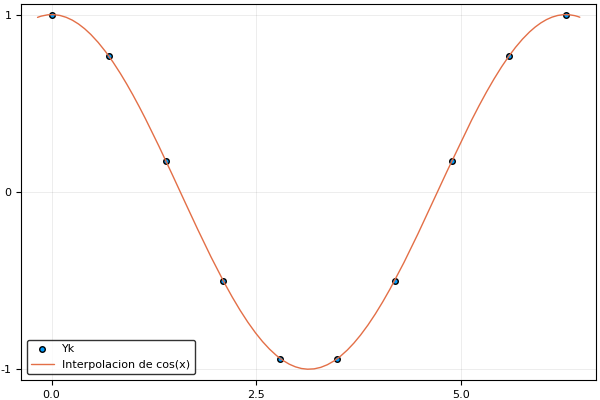

In [320]:
scatter(Xk,PuntosLagrange(Xk,g),label="Yk")
plot!(InterpolacionLagrange(Xk,PuntosLagrange(Xk,g)),label="Interpolacion de cos(x)")

In [321]:
InterpolacionLagrange(Xk,PuntosLagrange(Xk,h))

                      9                        8                       7      
5.42101086242752e-19*x  + 0.00125598518133148*x  - 0.0315663505495083*x  + 0.3

                6                     5                     4                 
13492883032328*x  - 1.54753813738557*x  + 3.89900431361709*x  - 4.569596087984

   3                     2                            
8*x  + 2.02232704563058*x  - 0.784017877200931*x + 1.0


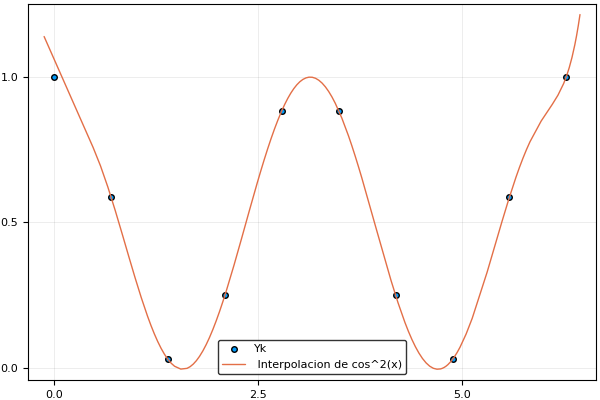

In [322]:
scatter(Xk,PuntosLagrange(Xk,h),label="Yk")
plot!(InterpolacionLagrange(Xk,PuntosLagrange(Xk,h)),label=" Interpolacion de cos^2(x)")

## Ejercicio 5.
Copiaré mi código de los métodos de integración nuevamente para poder hacer las comparaciones que se piden en el ejercicio. 

In [323]:

function IntegracionRiemann(f,a,b,n)
xk=linspace(a,b,n)
IR=0
s=convert(Int64,n-1)    
    for i in 1:s
        IR=IR+f(xk[i+1])*(xk[i+1]-xk[i])
    end
    IR
end

IntegracionRiemann (generic function with 1 method)

In [324]:
function IntegracionTrapecio(f,a,b,n)
h=(b-a)/n
IT=h*(f(a)+f(b))/2   
    for i in 1:n
      IT=IT+f(a+((b-a)*i/n))*h
    end
    IT
end

IntegracionTrapecio (generic function with 1 method)

In [325]:
T=IntegracionTrapecio.(p,0,2*pi,linspace(10,1e5,100))
R=IntegracionRiemann.(p,0,2*pi,linspace(10,1e5,100))
S=IntegracionSimpson.(p,0,2*pi,linspace(10,1e5,100))

100-element Array{Float64,1}:
 -2.22045e-16
  2.57905e-17
 -6.85893e-17
  3.85344e-16
 -2.17987e-16
  2.53424e-17
  3.68075e-16
 -7.67427e-16
  7.60847e-19
 -4.29281e-16
 -1.11193e-16
  5.42939e-17
 -7.76563e-16
  ⋮          
  9.14866e-17
  2.95391e-16
 -5.72345e-17
  3.07896e-16
 -9.40904e-17
  1.11145e-16
 -4.50767e-16
  1.57953e-17
  6.71337e-18
  3.50492e-16
 -1.49763e-16
  2.89485e-16


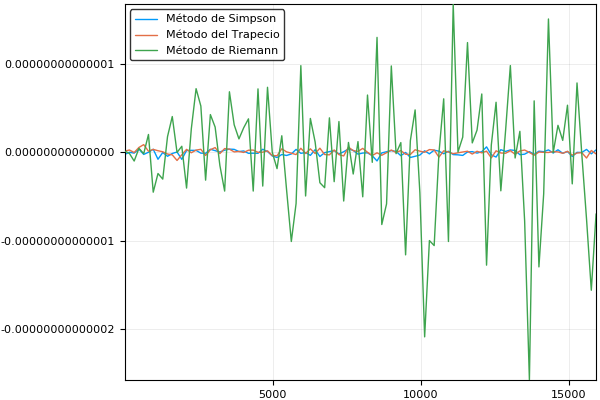

In [326]:
plot(linspace(10,1e5,100)/(2*pi),S,label="Método de Simpson")
plot!(linspace(10,1e5,100)/(2*pi),T,label="Método del Trapecio")
plot!(linspace(10,1e5,100)/(2*pi),R,label="Método de Riemann")

Podemos notar que aunque en esta gráfica pareciera muy exagerado el error este es muy pequeño para los tres métodos, ya que casi todos están suficientemente cerca del valor exacto de la integral el cual es 0, cabe notar que el método de Riemann es el que más error tiene respecto a los otros métodos pues para un ancho suficientemente pequeño el error tiene diferente orden de magnitud (aunque muy pequeño) que el error de los otros dos métodos.